In [33]:
import pandas as pd
import numpy as np
import json
import traceback, sys
import matplotlib.pyplot as plt
import seaborn as sns
# Import display from IPython to display the dataframes
from IPython.display import display

In [34]:
# Adjust the display width for the "Range" column
pd.set_option('display.max_colwidth', 100)  # Set to desired width

In [35]:
BASE_PATH = "/Users/shamweelmohammed/Desktop/Masters/Research/trace/analysis/output/june_7/model_loading/"

In [36]:
REPORTS_PATH = "/Users/shamweelmohammed/Desktop/Masters/Research/trace/apr19/reports_inference_profile_llama_apr19_3_bsz_1/"

In [37]:
def prepare_data(df, threshold, time_percentage_col, operation_col):
    small_slices = df[df[time_percentage_col] < threshold]
    if not small_slices.empty:
        other_data = pd.DataFrame({time_percentage_col: [small_slices[time_percentage_col].sum()], 
                                   operation_col: ['Others']})
        df = pd.concat([df[df[time_percentage_col] >= threshold], other_data], ignore_index=True)
    return df

In [38]:
def get_others_items(df, threshold, time_percentage_col, operation_col):
    small_slices = df[df[time_percentage_col] < threshold]
    if not small_slices.empty:
        other_items = small_slices[operation_col].tolist()
        return other_items
    else:
        return []

In [39]:
# def plot_pie_chart(df, title, threshold, percentage_col, stat_col, stat_base, operation_col, colors, legend_title, plt_title, figsize=(10, 10)):
#     # Prepare the data for the pie chart
#     df_filtered = prepare_data(df, threshold, percentage_col, operation_col)
    
#     # Get the items that are grouped as others
#     others_items = get_others_items(df, threshold, percentage_col, operation_col)
    
#     # Setup pie chart plot
#     plt.figure(figsize=figsize)  # Increase figure size for better readability

#     # Plot pie chart without showing percentages on the pie
#     # wedges, texts, autotexts = plt.pie(df_filtered[percentage_col],
#     #                                    startangle=140, colors=colors, textprops={'fontsize': 12}, autopct='%1.1f%%')
#     wedges, texts = plt.pie(df_filtered[percentage_col], startangle=140, colors=colors, textprops={'fontsize': 12})

#     # Calculate the percentages for the pie chart
#     total = sum(df_filtered[percentage_col])
#     percentages = [f'{(x/total) * 100:.3f}%' for x in df_filtered[percentage_col]]

#     # Round time values to four decimal places and add suffix
#     df_filtered["Stat_Col"] = df_filtered[stat_col].apply(lambda x: f'{x:.2f} {stat_base}')

#     # Each operation must not be more than 50 characters
#     df_filtered[operation_col] = df_filtered[operation_col].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)
    
#     # Create custom labels for each slice with times included
#     legend_labels = [f'{op} - {perc} ({stat})' for op, perc, stat in zip(df_filtered[operation_col], percentages, df_filtered["Stat_Col"])]
    
#     # Adding a legend to handle small slices or clarify the chart
#     plt.legend(wedges, legend_labels, title=legend_title, loc="best", fontsize='small')

#     # Better title display
#     plt.title(plt_title, fontsize=14, fontweight='bold')
    
#     # Show plot with adjustments
#     plt.show()
    
#     return others_items
def plot_pie_chart(df, title, threshold, percentage_col, stat_col, stat_base, operation_col, colors, legend_title, plt_title, figsize=(10, 10)):
    # Prepare the data for the pie chart
    df_filtered = prepare_data(df, threshold, percentage_col, operation_col)
    
    # Get the items that are grouped as others
    others_items = get_others_items(df, threshold, percentage_col, operation_col)
    
    # Setup pie chart plot
    plt.figure(figsize=figsize)  # Increase figure size for better readability

    # Plot pie chart without showing percentages on the pie
    # wedges, texts, autotexts = plt.pie(df_filtered[percentage_col],
    #                                    startangle=140, colors=colors, textprops={'fontsize': 12}, autopct='%1.1f%%')
    # wedges, texts = plt.pie(df_filtered[percentage_col], startangle=140, colors=colors, textprops={'fontsize': 12})
    wedges, texts = plt.pie(df_filtered[percentage_col], startangle=140, colors=colors, textprops={'fontsize': 14})

    # Calculate the percentages for the pie chart
    total = sum(df_filtered[percentage_col])
    percentages = [f'{(x/total) * 100:.3f}%' for x in df_filtered[percentage_col]]

    # Round time values to four decimal places and add suffix
    df_filtered["Stat_Col"] = df_filtered[stat_col].apply(lambda x: f'{x:.2f} {stat_base}')

    # Each operation must not be more than 50 characters
    df_filtered[operation_col] = df_filtered[operation_col].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)
    
    # Create custom labels for each slice with times included
    legend_labels = [f'{op} - {perc} ({stat})' for op, perc, stat in zip(df_filtered[operation_col], percentages, df_filtered["Stat_Col"])]
    
    # Adding a legend to handle small slices or clarify the chart
    plt.legend(wedges, legend_labels, title=legend_title, loc="best", fontsize='small')

    # Better title display
    # plt.title(plt_title, fontsize=14, fontweight='bold')
    plt.title(plt_title, fontsize=16, fontweight='bold')
    
    # Show plot with adjustments
    plt.show()
    
    return others_items

In [40]:
# def plot_bar_chart(df, title, threshold, percentage_col, stat_col, stat_base, operation_col, x_label, y_label, bar_label, bar_color='b', figsize=(8, 4), legends=True, bar_width = 0.35, xlabel_rotation=25):
#     # Prepare the data for the bar chart
#     df_bar = df.sort_values(by=percentage_col, ascending=False)
    
#     # Set "Others" for items less than threshold
#     df_bar = prepare_data(df_bar, threshold, percentage_col, operation_col)
    
#     # Get the list of items that are aggregated into 'Others'
#     other_items = get_others_items(df, threshold, percentage_col, operation_col)
    
#     # Setup bar chart plot
#     plt.figure(figsize=figsize)  # Increase figure size for better readability
    
#     # Plot bar chart with additional information
#     fig, ax = plt.subplots(figsize=figsize)
    
#     index = np.arange(len(df_bar))
    
#     # Each operation must not be more than 50 characters
#     df_bar[operation_col] = df_bar[operation_col].apply(lambda x: x[:50])
    
#     # Plot bars
#     bar1 = ax.bar(index, df_bar[percentage_col], bar_width, label=bar_label, color=bar_color)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)
#     ax.set_title(title)
#     ax.set_xticks(index)
#     ax.set_xticklabels(df_bar[operation_col], rotation=xlabel_rotation)
    
#     if legends:
#         ax.legend()
        
#     # Add data labels
#     for i, v in enumerate(df_bar[percentage_col]):
#         ax.text(i, v + 0.5, str(round(v, 2)), color='black', ha='center')
#         # ax.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center')
        
#     plt.grid(True)  # Add grid for better visibility
#     plt.tight_layout()  # Adjust layout to not cut off labels
#     plt.show()
    
#     return other_items
def plot_bar_chart(df, title, threshold, percentage_col, stat_col, stat_base, operation_col, x_label, y_label, bar_label, bar_color='b', figsize=(8, 4), legends=True, bar_width = 0.35, xlabel_rotation=25):
    # Prepare the data for the bar chart
    df_bar = df.sort_values(by=percentage_col, ascending=False)
    
    # Set "Others" for items less than threshold
    df_bar = prepare_data(df_bar, threshold, percentage_col, operation_col)
    
    # Get the list of items that are aggregated into 'Others'
    other_items = get_others_items(df, threshold, percentage_col, operation_col)
    
    # Setup bar chart plot
    plt.figure(figsize=figsize)  # Increase figure size for better readability
    
    # Plot bar chart with additional information
    fig, ax = plt.subplots(figsize=figsize)
    
    index = np.arange(len(df_bar))
    
    # Each operation must not be more than 50 characters
    df_bar[operation_col] = df_bar[operation_col].apply(lambda x: x[:50])
    
    # Plot bars
    bar1 = ax.bar(index, df_bar[percentage_col], bar_width, label=bar_label, color=bar_color)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(index)
    ax.set_xticklabels(df_bar[operation_col], rotation=xlabel_rotation)
    
    if legends:
        ax.legend()
        
    # Add data labels
    for i, v in enumerate(df_bar[percentage_col]):
        ax.text(i, v + 0.5, str(round(v, 2)), color='black', ha='center')
        # ax.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center')
        
    plt.grid(True)  # Add grid for better visibility
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()
    
    return other_items

In [41]:
# def plot_time(df, title, limit, time_col, name_col, label_col, x_label, y_label, legend_label, bar_color='b', figsize=(12, 6), legends = False, bar_width = 0.35, xlabel_rotation=45):
#     # Prepare the data for the bar chart
#     df_sorted = df.sort_values(by=time_col, ascending=False).head(limit)
    
#     # Setup bar chart plot
#     plt.figure(figsize=figsize)  # Increase figure size for better readability
    
#     bar_width = 0.35  # Increase bar width for better visibility
#     index = np.arange(len(df_sorted))
    
#     fig, ax = plt.subplots(figsize=figsize)
    
#     # Plot bars
#     bars = ax.bar(index, df_sorted[time_col], bar_width, label=legend_label, color=bar_color)
    
#     ax.set_xlabel(x_label, fontsize=14)
#     ax.set_ylabel(y_label, fontsize=14)
#     ax.set_title(title, fontsize=16)
#     ax.set_xticks(index)
#     ax.set_xticklabels(df_sorted[name_col], rotation=xlabel_rotation, fontsize=12)  # Use operation names as labels
    
#     if legends:
#         ax.legend(fontsize=12)
    
#     # Add data labels from label_col
#     for bar in bars:
#         yval = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02*max(df_sorted[time_col]), f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
        
#     plt.grid(True)  # Add grid
#     plt.tight_layout()  # Adjust layout to not cut off labels
#     plt.show()

def plot_time(df, title, limit, time_col, name_col, label_col, x_label, y_label, legend_label, bar_color='b', figsize=(12, 6), legends = False, bar_width = 0.35, xlabel_rotation=45):
    # Prepare the data for the bar chart
    df_sorted = df.sort_values(by=time_col, ascending=False).head(limit)
    
    # Setup bar chart plot
    plt.figure(figsize=figsize)  # Increase figure size for better readability
    
    bar_width = 0.35  # Increase bar width for better visibility
    index = np.arange(len(df_sorted))
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot bars
    bars = ax.bar(index, df_sorted[time_col], bar_width, label=legend_label, color=bar_color)
    
    # ax.set_xlabel(x_label, fontsize=14)
    # ax.set_ylabel(y_label, fontsize=14)
    # ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_title(title, fontsize=18)
    
    ax.set_xticks(index)
    # ax.set_xticklabels(df_sorted[name_col], rotation=xlabel_rotation, fontsize=12)  # Use operation names as labels
    ax.set_xticklabels(df_sorted[name_col], rotation=xlabel_rotation, fontsize=14)  # Use operation names as labels
    
    if legends:
        # ax.legend(fontsize=12)
        ax.legend(fontsize=14)
    
    # Add data labels from label_col
    for bar in bars:
        yval = bar.get_height()
        # ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02*max(df_sorted[time_col]), f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02*max(df_sorted[time_col]), f'{yval:.2f}', ha='center', va='bottom', fontsize=14)
        
    plt.grid(True)  # Add grid
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()

# CUDA API Summary

In [42]:
cupa_api_summary_csv_path = BASE_PATH + "cuda_api_summary.csv"
df_cupa_api_summary = pd.read_csv(cupa_api_summary_csv_path)

In [43]:
df_cupa_api_summary

,Time (%),Total Time (ns),Instances,Avg (ns),Med (ns),Min (ns),Max (ns),StdDev (ns),Operation,Category
0,86.831550,2375507047,582,4.081627e+06,3171792.0,9510,19638641,3.206453e+06,cudaMemcpyAsync,MEMORY_OPER
1,8.148573,222925793,280,7.961635e+05,13420.0,9860,44947910,4.365736e+06,cudaLaunchKernel,CUDA_API
2,4.637789,126879000,480,2.643312e+05,239078.5,209729,1102723,9.686421e+04,cudaMalloc,MEMORY_OPER
3,0.284093,7772116,582,1.335415e+04,14110.0,3950,259159,1.499185e+04,cudaStreamSynchronize,CUDA_API
4,0.082547,2258288,1,2.258288e+06,2258288.0,2258288,2258288,NaN,cudaGetDeviceProperties_v2_v12000,CUDA_API
5,0.013657,373637,240,1.556821e+03,1450.0,1300,15439,1.028034e+03,cudaStreamIsCapturing_v10000,CUDA_API
6,0.000950,25990,2,1.299500e+04,12995.0,12900,13090,1.343503e+02,cudaDeviceSynchronize,CUDA_API
7,0.000751,20550,1,2.055000e+04,20550.0,20550,20550,NaN,cudaProfilerStart,CUDA_API
8,0.000090,2470,1,2.470000e+03,2470.0,2470,2470,NaN,cuModuleGetLoadingMode,CUDA_API


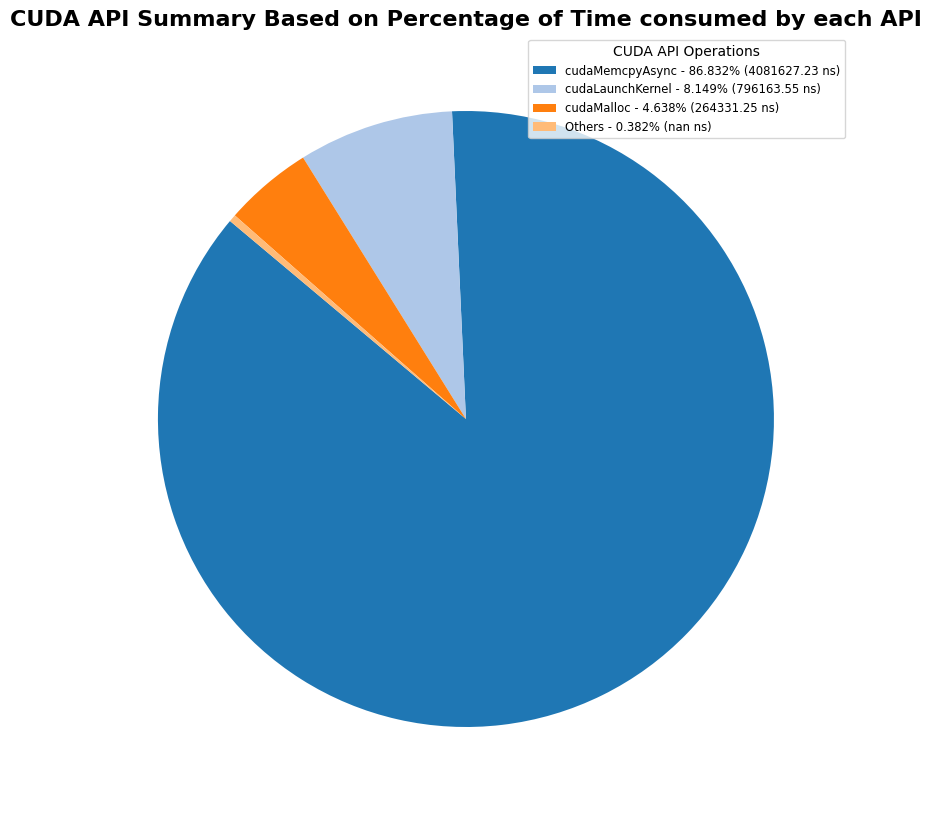

['cudaStreamSynchronize',
 'cudaGetDeviceProperties_v2_v12000',
 'cudaStreamIsCapturing_v10000',
 'cudaDeviceSynchronize',
 'cudaProfilerStart',
 'cuModuleGetLoadingMode']

In [44]:
others_items = plot_pie_chart(df = df_cupa_api_summary,
                title = "CUDA API Summary Based on Percentage of Time consumed by each API",
                threshold = 0.5,
                percentage_col = 'Time (%)',
                stat_col = 'Avg (ns)',
                stat_base = 'ns',
                legend_title = "CUDA API Operations",
                operation_col = "Operation",
                # colors = sns.color_palette("hsv", len(df_cupa_api_summary)),
                colors = sns.color_palette("tab20", len(df_cupa_api_summary)),
                plt_title = "CUDA API Summary Based on Percentage of Time consumed by each API",
                figsize = (10, 10))

others_items

<Figure size 800x400 with 0 Axes>

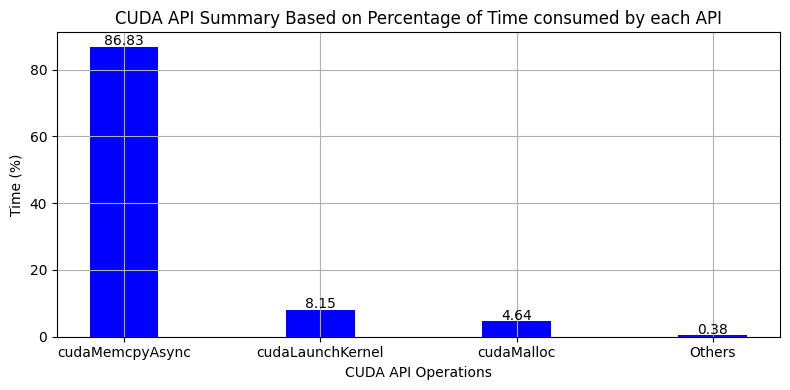

['cudaStreamSynchronize',
 'cudaGetDeviceProperties_v2_v12000',
 'cudaStreamIsCapturing_v10000',
 'cudaDeviceSynchronize',
 'cudaProfilerStart',
 'cuModuleGetLoadingMode']

In [45]:
other_items = plot_bar_chart(df = df_cupa_api_summary,
                title = "CUDA API Summary Based on Percentage of Time consumed by each API",
                threshold = 0.5,
                percentage_col = 'Time (%)',
                stat_col = 'Avg (ns)',
                stat_base = 'ns',
                operation_col = "Operation",
                x_label = "CUDA API Operations",
                y_label = "Time (%)",
                bar_label = "Time (%)",
                bar_color = 'b',
                figsize = (8, 4),
                legends = False,
                bar_width = 0.35,
                xlabel_rotation = 0)
other_items

<Figure size 1200x1000 with 0 Axes>

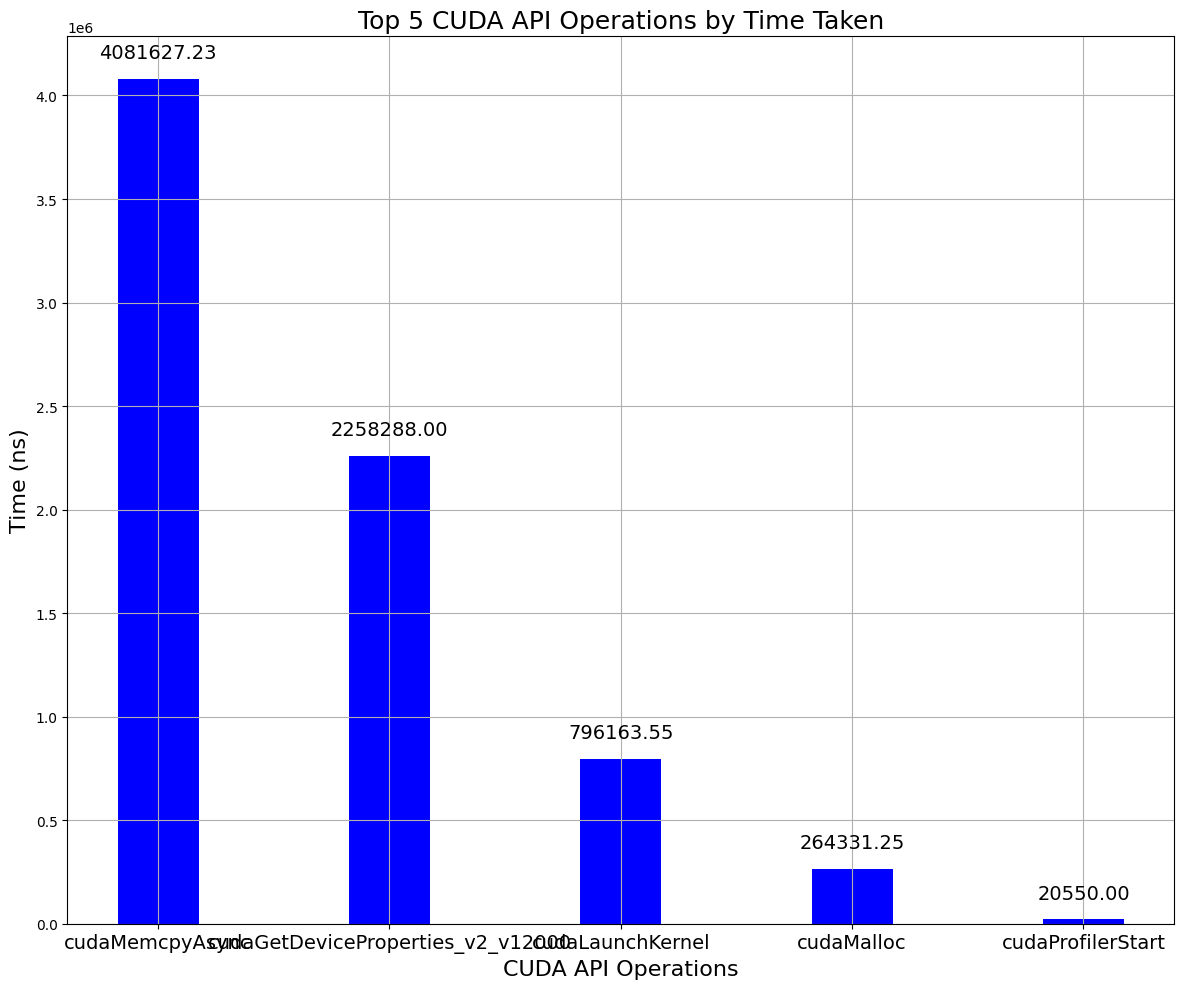

In [46]:
# Plot the top 5 CUDA API operations by time taken ('Avg (ns)')
plot_time(df = df_cupa_api_summary,
            title = "Top 5 CUDA API Operations by Time Taken",
            limit = 5,
            time_col = 'Avg (ns)',
            name_col = 'Operation',
            label_col = 'Avg (ns)',
            x_label = "CUDA API Operations",
            y_label = "Time (ns)",
            legend_label = "Avg Time (ns)",
            bar_color = 'b',
            figsize = (12, 10),
            legends = False,
            bar_width = 0.35,
            xlabel_rotation = 0)

In [47]:
cuda_api_trace_filtered_csv_path = BASE_PATH + "cuda_api_trace_filtered.csv"
df_cuda_api_trace_filtered = pd.read_csv(cuda_api_trace_filtered_csv_path)

In [48]:
df_cuda_api_trace_filtered

,Start (ns),Duration (ns),Name,Result,CorrID,Pid,Tid,T-Pri,Thread Name
0,3340891939,2470,cuModuleGetLoadingMode,0,1,734,734,20,python
1,3381961391,2258288,cudaGetDeviceProperties_v2_v12000,0,127,734,734,20,python
2,9240404820,15439,cudaStreamIsCapturing_v10000,0,137,734,734,20,python
3,9240428409,556777,cudaMalloc,0,138,734,734,20,python
4,9240428649,556357,cudaMalloc,0,138,734,734,20,python
...,...,...,...,...,...,...,...,...,...
2164,15475223807,16780,cudaStreamSynchronize,0,7377,734,734,20,python
2165,15475225257,15160,cudaStreamSynchronize,0,7377,734,734,20,python
2166,15491130778,20550,cudaProfilerStart,0,7382,734,734,20,python
2167,15491371587,13090,cudaDeviceSynchronize,0,7385,734,734,20,python


# Malloc and Free

In [49]:
# Get all instances of "cudaMalloc" operations
df_cuda_malloc = df_cuda_api_trace_filtered[df_cuda_api_trace_filtered['Name'] == 'cudaMalloc']
df_cuda_malloc

,Start (ns),Duration (ns),Name,Result,CorrID,Pid,Tid,T-Pri,Thread Name
3,9240428409,556777,cudaMalloc,0,138,734,734,20,python
4,9240428649,556357,cudaMalloc,0,138,734,734,20,python
6,9242980645,275729,cudaMalloc,0,149,734,734,20,python
7,9242980735,275519,cudaMalloc,0,149,734,734,20,python
9,9243726581,215349,cudaMalloc,0,160,734,734,20,python
...,...,...,...,...,...,...,...,...,...
967,9463228271,261699,cudaMalloc,0,4541,734,734,20,python
969,9463916878,261968,cudaMalloc,0,4552,734,734,20,python
970,9463916958,261768,cudaMalloc,0,4552,734,734,20,python
978,9465310730,394028,cudaMalloc,0,4602,734,734,20,python


In [50]:
# Total duration of cudaMalloc calls
total_duration = df_cuda_malloc["Duration (ns)"].sum()

# Average duration of cudaMalloc calls
average_duration = df_cuda_malloc["Duration (ns)"].mean()

# Total number of cudaMalloc calls
total_calls = df_cuda_malloc.shape[0]

print(f"Total Duration of cudaMalloc calls: {total_duration} ns")
print(f"Average Duration of cudaMalloc calls: {average_duration} ns")
print(f"Total Number of cudaMalloc calls: {total_calls}")

Total Duration of cudaMalloc calls: 126879000 ns
Average Duration of cudaMalloc calls: 264331.25 ns
Total Number of cudaMalloc calls: 480


In [51]:
# Get all instances of "cudaFree" operations
df_cuda_free = df_cuda_api_trace_filtered[df_cuda_api_trace_filtered['Name'] == 'cudaFree']
df_cuda_free

,Start (ns),Duration (ns),Name,Result,CorrID,Pid,Tid,T-Pri,Thread Name


In [52]:
# Total duration of cudaFree calls
total_duration = df_cuda_free["Duration (ns)"].sum()

# Average duration of cudaFree calls
average_duration = df_cuda_free["Duration (ns)"].mean()

# Total number of cudaFree calls
total_calls = df_cuda_free.shape[0]

print(f"Total Duration of cudaFree calls: {total_duration} ns")
print(f"Average Duration of cudaFree calls: {average_duration} ns")
print(f"Total Number of cudaFree calls: {total_calls}")

Total Duration of cudaFree calls: 0 ns
Average Duration of cudaFree calls: nan ns
Total Number of cudaFree calls: 0


# CUDA Memtime Summary

In [55]:
cuda_memtime_summary_csv_path = BASE_PATH + "cuda_memtime_summary.csv"
df_cuda_memtime_summary = pd.read_csv(cuda_memtime_summary_csv_path)

In [56]:
df_cuda_memtime_summary

,Operation,Total Time (ns),Count,Avg (ns),Med (ns),Min (ns),Max (ns),StdDev (ns),Time (%)
0,[CUDA memcpy Host-to-Device],1166380807,291,4.008181e+06,3075528.0,2560,19562456,3.189449e+06,100.0


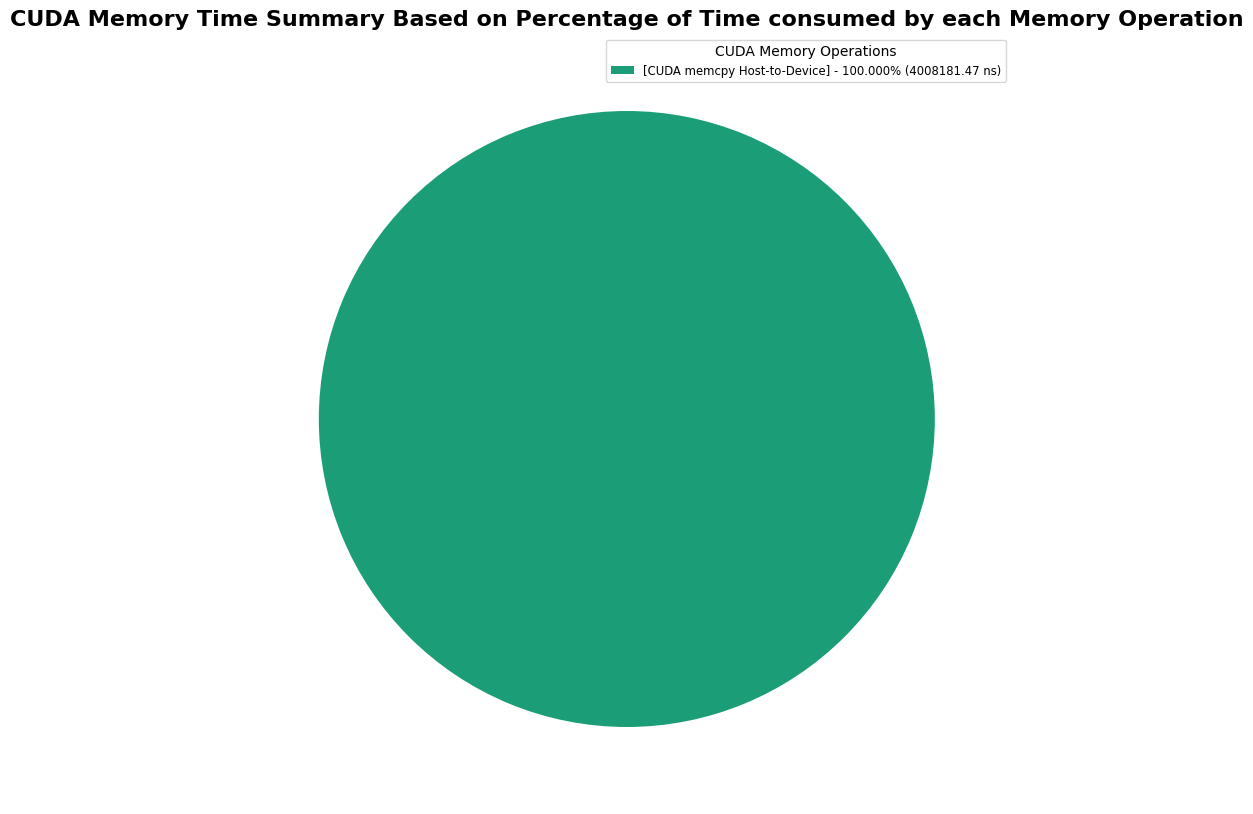

[]

In [57]:
other_items = plot_pie_chart(df = df_cuda_memtime_summary,
                title = "CUDA Memory Time Summary Based on Percentage of Time consumed by each Memory Operation",
                threshold = 0.000,
                percentage_col = 'Time (%)',
                stat_col = 'Avg (ns)',
                stat_base = 'ns',
                legend_title = "CUDA Memory Operations",
                operation_col = "Operation",
                # Color with brown color palette other than tab20
                colors = sns.color_palette("Dark2", len(df_cuda_memtime_summary)),
                plt_title = "CUDA Memory Time Summary Based on Percentage of Time consumed by each Memory Operation",
                figsize = (10, 10))

other_items

<Figure size 1000x1000 with 0 Axes>

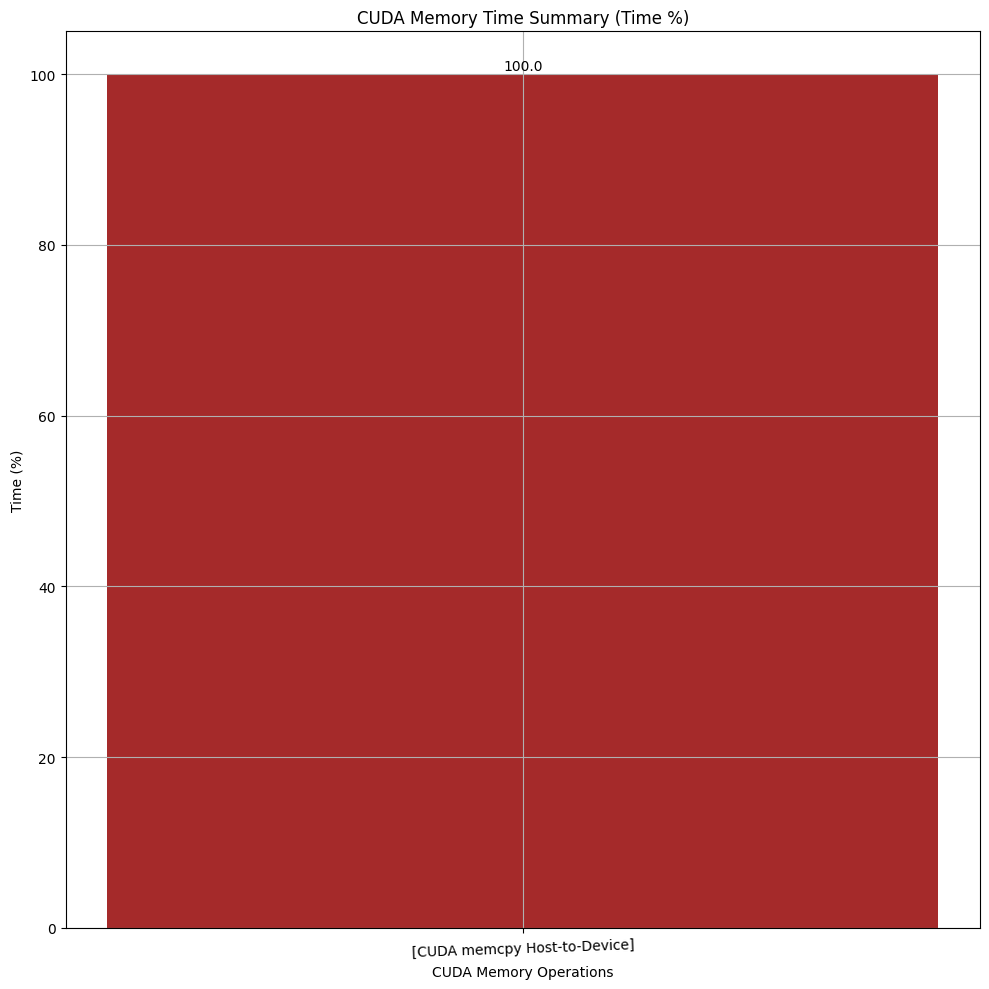

[]

In [58]:
other_items = plot_bar_chart(df = df_cuda_memtime_summary,
                title = "CUDA Memory Time Summary (Time %)",
                threshold = 0.0000,
                percentage_col = 'Time (%)',
                stat_col = 'Avg (ns)',
                stat_base = 'ns',
                operation_col = "Operation",
                x_label = "CUDA Memory Operations",
                y_label = "Time (%)",
                bar_label = "Time (%)",
                bar_color = 'brown',
                figsize = (10, 10),
                legends = False,
                bar_width = 0.35,
                xlabel_rotation = 2)

other_items

<Figure size 1200x1000 with 0 Axes>

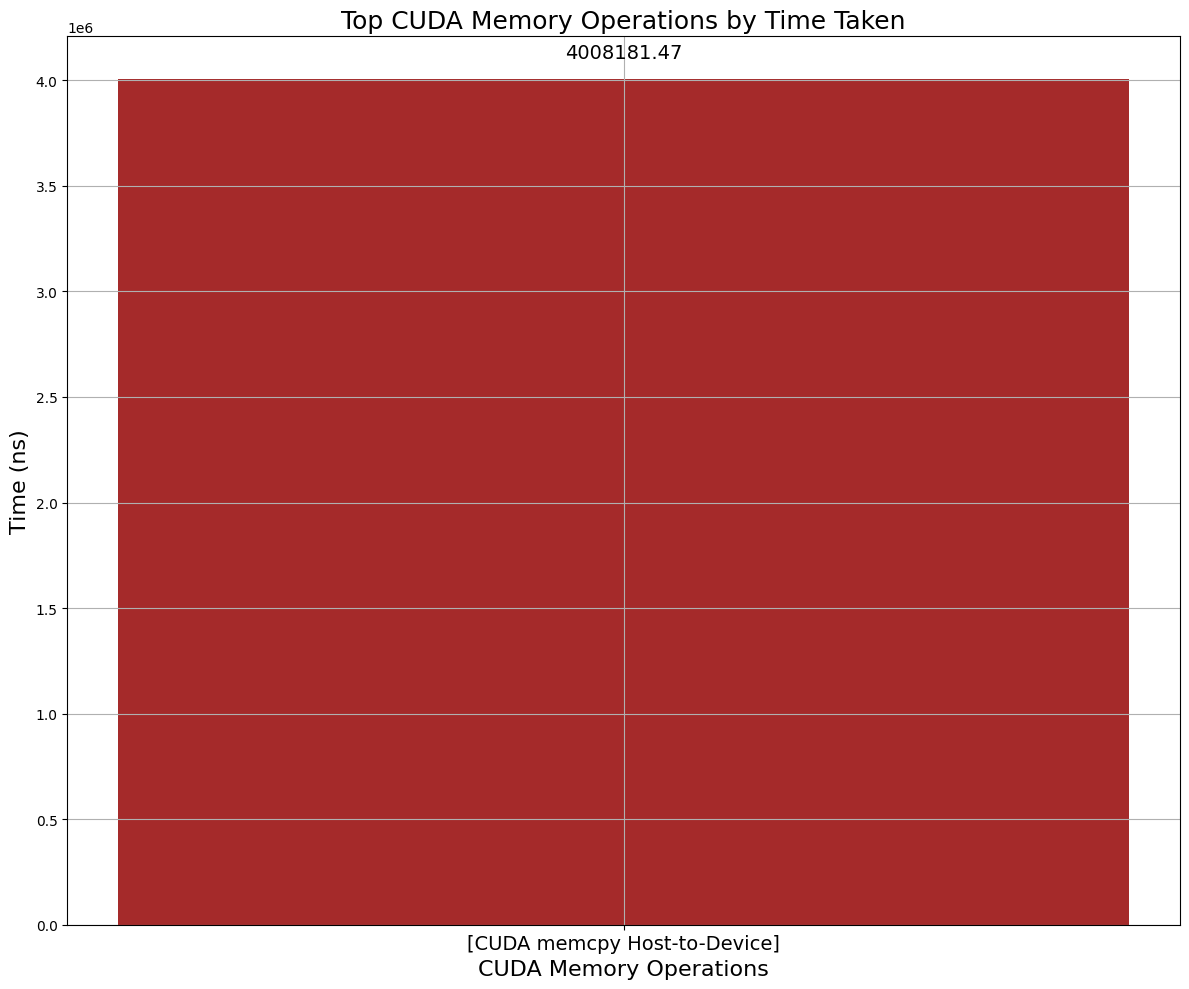

In [59]:
# Plot the top 5 CUDA Memory operations by time taken ('Avg (ns)')
plot_time(df = df_cuda_memtime_summary,
            title = "Top CUDA Memory Operations by Time Taken",
            limit = 5,
            time_col = 'Avg (ns)',
            name_col = 'Operation',
            label_col = 'Avg (ns)',
            x_label = "CUDA Memory Operations",
            y_label = "Time (ns)",
            legend_label = "Time (ns)",
            bar_color = 'brown',
            figsize = (12, 10),
            legends = False,
            bar_width = 0.15,
            xlabel_rotation = 0)

# CUDA Memsize Summary

In [63]:
cuda_memsize_summary_csv_path = BASE_PATH + "cuda_memsize_summary.csv"
df_cuda_memsize_summary = pd.read_csv(cuda_memsize_summary_csv_path)

In [64]:
df_cuda_memsize_summary

,Operation,Total (MB),Count,Avg (MB),Med (MB),Min (MB),Max (MB),StdDev (MB),Size_Percent
0,[CUDA memcpy Device-to-Device],44.672,4225,0.010573,0.008,0.0,0.128,0.016233,0.330297
1,[CUDA memcpy Device-to-Host],0.001,193,0.000005,0.000,0.0,0.001,0.000072,0.000007
2,[CUDA memcpy Host-to-Device],13476.808,293,45.995932,33.554,0.0,262.144,38.921724,99.645089
3,[CUDA memset],3.328,384,0.008667,0.011,0.0,0.011,0.004033,0.024607


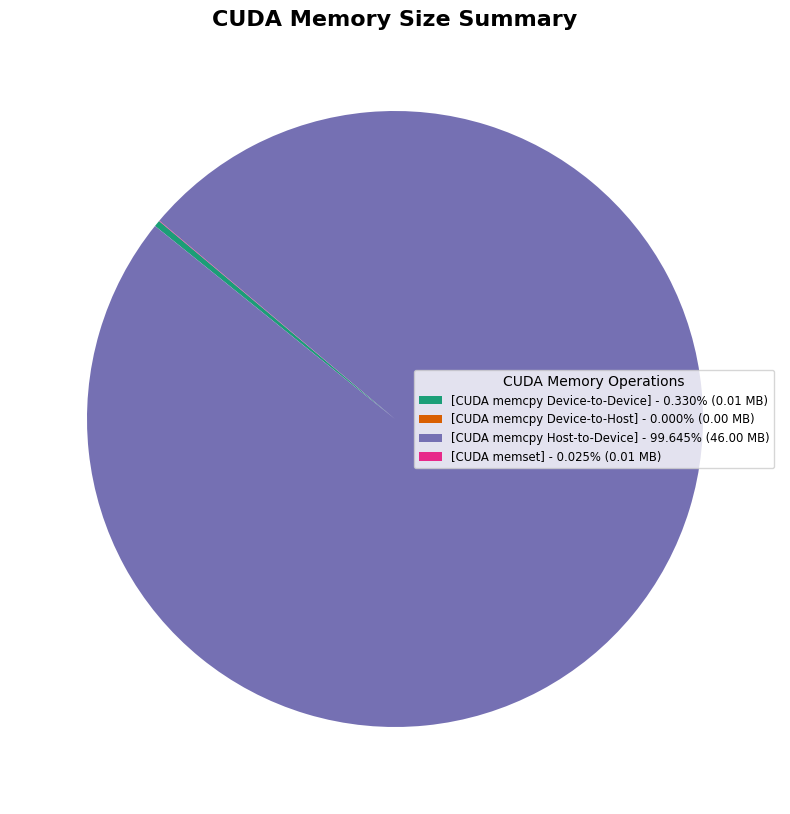

[]

In [65]:
other_items = plot_pie_chart(df = df_cuda_memsize_summary,
                title = "CUDA Memory Size Summary Based on Percentage of Size consumed by each Memory Operation",
                threshold = 0.0000,
                percentage_col = 'Size_Percent',
                stat_col = 'Avg (MB)',
                stat_base = 'MB',
                legend_title = "CUDA Memory Operations",
                operation_col = "Operation",
                # Color with brown color palette other than tab20
                colors = sns.color_palette("Dark2", len(df_cuda_memsize_summary)),
                plt_title = "CUDA Memory Size Summary",
                figsize = (10, 10))                

other_items     

<Figure size 1000x600 with 0 Axes>

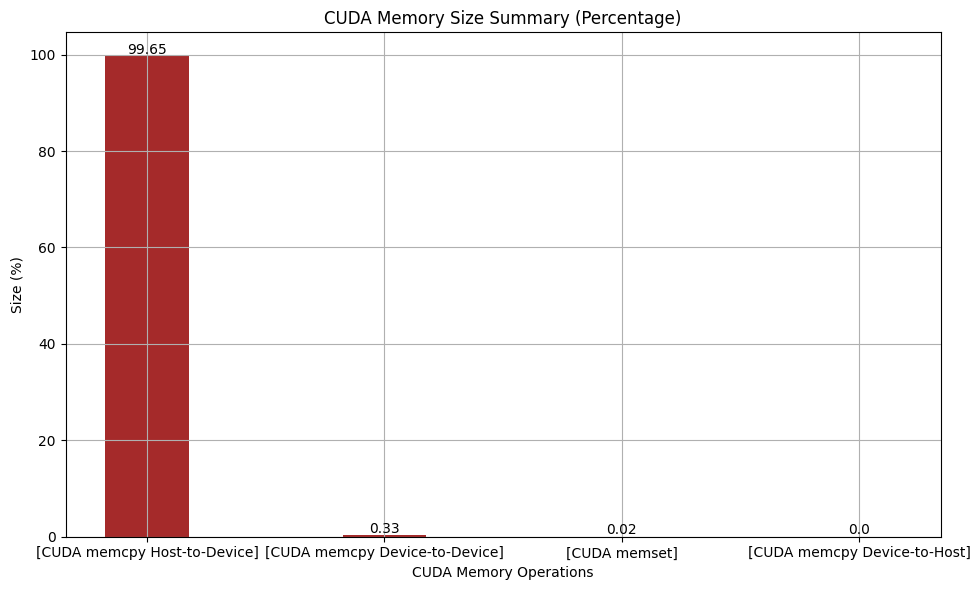

[]

In [66]:
other_items = plot_bar_chart(df = df_cuda_memsize_summary,
                title = "CUDA Memory Size Summary (Percentage)",
                threshold = 0.0000,
                percentage_col = 'Size_Percent',
                stat_col = 'Avg (MB)',
                stat_base = 'MB',
                operation_col = "Operation",
                x_label = "CUDA Memory Operations",
                y_label = "Size (%)",
                bar_label = "Size (%)",
                bar_color = 'brown',
                figsize = (10, 6),
                legends = False,
                bar_width = 0.35,
                xlabel_rotation = 0)

other_items

<Figure size 1200x1200 with 0 Axes>

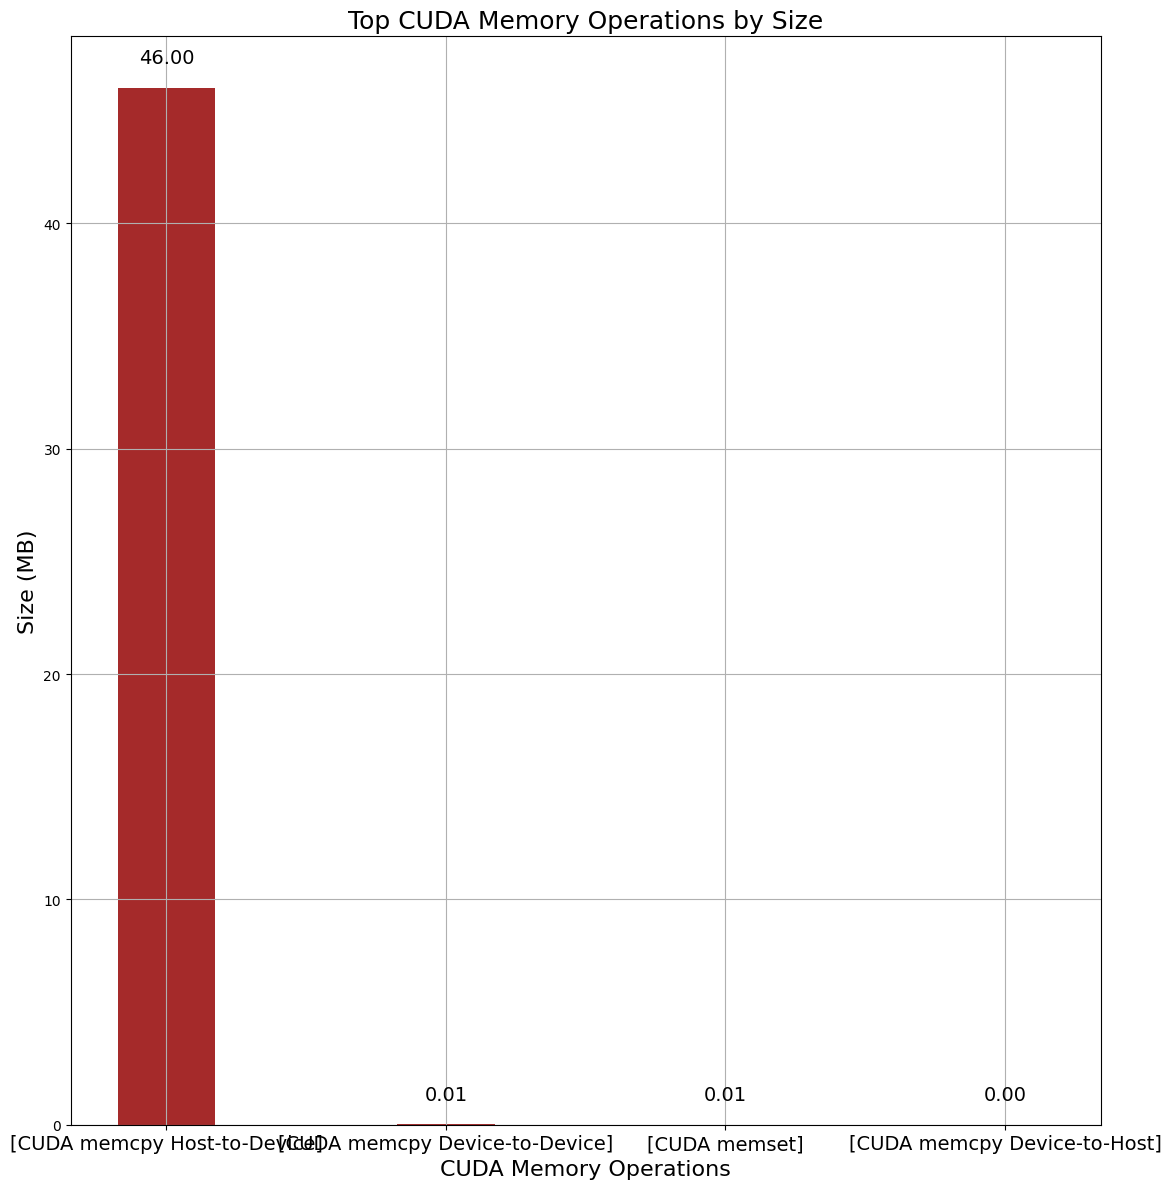

In [67]:
# Plot the top 10 CUDA Memory operations by size ('Size (bytes)')
plot_time(df = df_cuda_memsize_summary,
            title = "Top CUDA Memory Operations by Size",
            limit = 5,
            time_col = 'Avg (MB)',
            name_col = 'Operation',
            label_col = 'Avg (MB)',
            x_label = "CUDA Memory Operations",
            y_label = "Size (MB)",
            legend_label = "Size (MB)",
            bar_color = 'brown',
            figsize = (12, 12),
            legends = False,
            bar_width = 0.15,
            xlabel_rotation = 0)

# Kernel Summaries

In [68]:
# cuda_kernel_launch_and_exec_time_summary_short.csv
df_cuda_kernel_launch_and_exec_time_summary_short = pd.read_csv(BASE_PATH + "cuda_kernel_launch_and_exec_time_summary_short.csv")
df_cuda_kernel_launch_and_exec_time_summary_short

,PID,TID,DevId,Count,QCount,TAvg (ns),TMed (ns),TMin (ns),TMax (ns),TStdDev (ns),...,QMin (ns),QMax (ns),QStdDev (ns),KAvg (ns),KMed (ns),KMin (ns),KMax (ns),KStdDev (ns),API Function,Kernel Name
0,734,734,0,4,4,2.256004e+07,22560034.5,168107,44951972,2.585593e+07,...,2314.0,2524.0,148.492424,7984.000000,7984.0,6464,9504,1755.144818,cudaLaunchKernel,elementwise_kernel
1,734,734,0,2,2,1.403741e+07,14037411.0,14037356,14037466,7.778175e+01,...,NaN,NaN,NaN,4736.000000,4736.0,4736,4736,0.000000,cudaLaunchKernel,unrolled_elementwise_kernel
2,734,734,0,4,4,1.573768e+06,1573770.5,19119,3128412,1.795108e+06,...,1451.0,2209.0,381.863414,3424.000000,3424.0,3328,3520,110.851252,cudaLaunchKernel,elementwise_kernel_with_index
3,734,734,0,270,270,3.723867e+05,21486.0,15085,13697024,1.932424e+06,...,376.0,4561.0,858.090592,5714.481481,3392.0,2944,9024,2762.814367,cudaLaunchKernel,vectorized_elementwise_kernel


In [80]:
# print top 10 df items after sorting by 'KAvg (ns)'
df_top_10_cuda_kernel_launch_and_exec_time_summary_short = df_cuda_kernel_launch_and_exec_time_summary_short.sort_values(by='KAvg (ns)', ascending=False).head(10)

# Print "Operation", "Count", "KAvg (ns)", "API Function" columns
df_top_10_cuda_kernel_launch_and_exec_time_summary_short = df_top_10_cuda_kernel_launch_and_exec_time_summary_short[["Kernel Name", "Count", "KAvg (ns)", "AAvg (ns)", "TAvg (ns)", "QAvg (ns)", "API Function"]]
df_top_10_cuda_kernel_launch_and_exec_time_summary_short.index = np.arange(1, len(df_top_10_cuda_kernel_launch_and_exec_time_summary_short) + 1)
# df_top_10_cuda_kernel_launch_and_exec_time_summary_short
# Print all values without e+ notation
pd.options.display.float_format = '{:.2f}'.format
df_top_10_cuda_kernel_launch_and_exec_time_summary_short

,Kernel Name,Count,KAvg (ns),AAvg (ns),TAvg (ns),QAvg (ns),API Function
1,elementwise_kernel,4,7984.00,22552022.00,22560037.00,2419.00,cudaLaunchKernel
2,vectorized_elementwise_kernel,270,5714.48,364355.17,372386.71,2384.15,cudaLaunchKernel
3,unrolled_elementwise_kernel,2,4736.00,14033872.00,14037411.00,NaN,cudaLaunchKernel
4,elementwise_kernel_with_index,4,3424.00,1568516.50,1573768.00,1827.50,cudaLaunchKernel


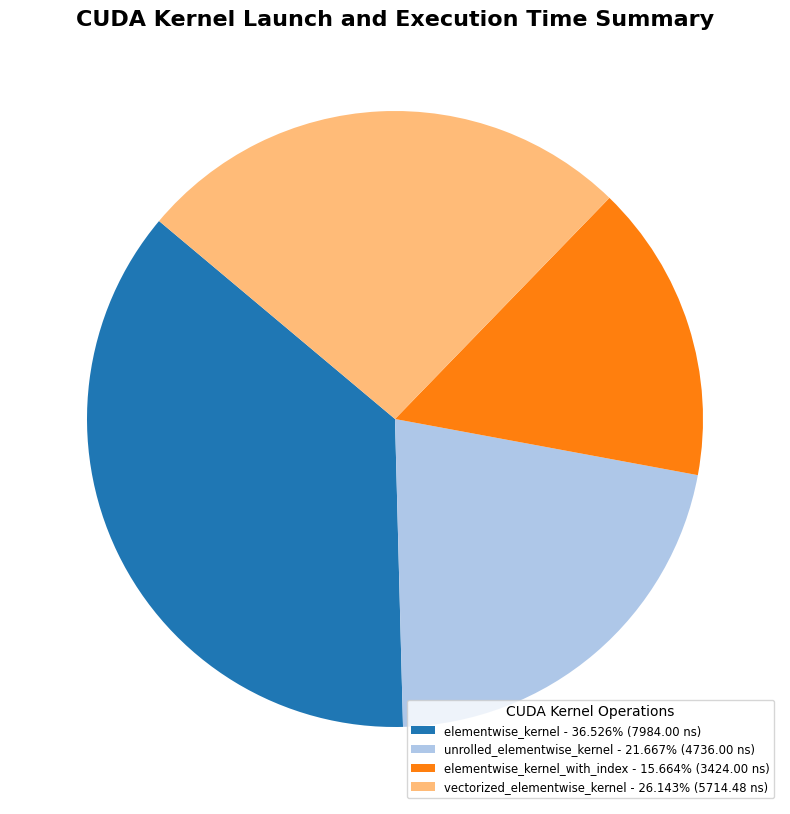

[]

In [70]:
# Plot the top 10 CUDA Kernel operations by time taken ('KAvg (ns)')
# Calculate the percentage of time taken by each operation
df_cuda_kernel_launch_and_exec_time_summary_short['Time (%)'] = (df_cuda_kernel_launch_and_exec_time_summary_short['KAvg (ns)'] / df_cuda_kernel_launch_and_exec_time_summary_short['KAvg (ns)'].sum()) * 100

plot_pie_chart(df = df_cuda_kernel_launch_and_exec_time_summary_short,
                title = "CUDA Kernel Launch and Execution Time Summary",
                threshold = 0.5,
                percentage_col = 'Time (%)',
                stat_col = 'KAvg (ns)',
                stat_base = 'ns',
                legend_title = "CUDA Kernel Operations",
                operation_col = "Kernel Name",
                colors = sns.color_palette("tab20", len(df_cuda_kernel_launch_and_exec_time_summary_short)),
                plt_title = "CUDA Kernel Launch and Execution Time Summary",
                figsize = (10, 10))

# NVTX GPU Proj Summary

In [81]:
nvtx_gpu_proj_summary_csv_path = BASE_PATH + "nvtx_gpu_proj_summary.csv"
df_nvtx_gpu_proj_summary = pd.read_csv(nvtx_gpu_proj_summary_csv_path)

In [82]:
df_nvtx_gpu_proj_summary

,Name,Style,Total_Proj_Time_ns,Total_Range_Time_ns,Range_Instances,Proj_Avg_ns,Proj_Med_ns,Proj_Min_ns,Proj_Max_ns,Proj_StdDev_ns,Total_GPU_Ops,Avg_GPU_Ops,Avg_Range_Lvl,Avg_Num_Child
0,"{'mod': 'Tensor', 'op': '__mul__', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), 'dtyp...",PushPop,3392,11051529,1,3392.00,3392.00,3392,3392,0.00,1,1.00,1419.00,0.00
1,"{'mod': 'Tensor', 'op': '__rpow__', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), 'dty...",PushPop,45301377,46096814,1,45301377.00,45301377.00,45301377,45301377,0.00,2,2.00,1417.00,1.00
2,"{'mod': 'Tensor', 'op': '__rtruediv__', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), ...",PushPop,11426369,25622768,1,11426369.00,11426369.00,11426369,11426369,0.00,2,2.00,1417.00,2.00
3,"{'mod': 'Tensor', 'op': '__truediv__', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), '...",PushPop,3392,12102923,1,3392.00,3392.00,3392,3392,0.00,1,1.00,1417.00,0.00
4,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (11008, 4096),...",PushPop,485005511,2150570815,64,7578211.11,7225013.00,6714100,11816002,899201.76,64,1.00,1417.00,0.00
5,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (32000, 4096),...",PushPop,38984431,217002684,2,19492215.50,19492215.50,19421975,19562456,99335.07,2,1.00,1417.00,0.00
6,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (4096, 11008),...",PushPop,237683209,1104133266,32,7427600.28,7113236.50,6579698,11205312,1061724.41,32,1.00,1417.00,0.00
7,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (4096, 4096), ...",PushPop,404536008,2292806924,128,3160437.56,2982040.00,2724456,7006772,686920.98,128,1.00,1417.00,0.00
8,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (4096,), 'dtyp...",PushPop,171648,9238259,65,2640.74,2624.00,2560,2944,61.20,65,1.00,1417.00,0.00
9,"{'mod': 'Tensor', 'op': 'float', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), 'dtype'...",PushPop,4736,14434200,1,4736.00,4736.00,4736,4736,0.00,1,1.00,1417.00,0.00


In [83]:
# Variables for customization
# Remove all rows where "Avg_GPU_Ops" is NaN or 0
df_nvtx_gpu_proj_summary = df_nvtx_gpu_proj_summary.dropna(subset=['Avg_GPU_Ops'])
df_nvtx_gpu_proj_summary = df_nvtx_gpu_proj_summary[df_nvtx_gpu_proj_summary['Avg_GPU_Ops'] != 0]

# Remove all "Name" that include "/home" or "traceMarker" and recalculate the time percentage
# Use regex to filter out the rows
df_nvtx_gpu_proj_summary = df_nvtx_gpu_proj_summary[~df_nvtx_gpu_proj_summary['Name'].str.contains('(/home|traceMarker)')]

/var/folders/sg/b1qbnvkj7fjbgjw1kzc9drzw0000gn/T/ipykernel_37603/2275252559.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_nvtx_gpu_proj_summary = df_nvtx_gpu_proj_summary[~df_nvtx_gpu_proj_summary['Name'].str.contains('(/home|traceMarker)')]


In [84]:
# Plot top n average GPU operations
df_gpu_proj_topn = df_nvtx_gpu_proj_summary.sort_values(by='Avg_GPU_Ops', ascending=False).head(100)

# Print the Name, Avg_GPU_Ops, and Time (%) columns
df_sample = df_gpu_proj_topn[['Name', 'Avg_GPU_Ops']]

# Print top 20 rows
df_sample[20:50]

,Name,Avg_GPU_Ops


In [85]:
# Top 10 GPU operations by time taken "Proj_Avg_ns"
df_gpu_proj_topn = df_nvtx_gpu_proj_summary.sort_values(by='Proj_Avg_ns', ascending=False).head(10)

df_gpu_proj_topn

,Name,Style,Total_Proj_Time_ns,Total_Range_Time_ns,Range_Instances,Proj_Avg_ns,Proj_Med_ns,Proj_Min_ns,Proj_Max_ns,Proj_StdDev_ns,Total_GPU_Ops,Avg_GPU_Ops,Avg_Range_Lvl,Avg_Num_Child
13,"{'mod': 'torch', 'op': 'manual_seed', 'args': []}",PushPop,58108556024,68522585660,1,58108556024.00,58108556024.00,58108556024,58108556024,0.00,88119,88119.00,1413.00,1.00
11,"{'mod': 'torch', 'op': '__getattr__', 'args': []}",PushPop,41082749108968,48809276093439,707,58108556024.00,58108556024.00,58108556024,58108556024,0.00,62300133,88119.00,707.00,3.33
18,"{'mod': 'torch', 'op': 'pow', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), 'dtype': '...",PushPop,45301377,45734786,1,45301377.00,45301377.00,45301377,45301377,0.00,2,2.00,1419.00,0.00
1,"{'mod': 'Tensor', 'op': '__rpow__', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), 'dty...",PushPop,45301377,46096814,1,45301377.00,45301377.00,45301377,45301377,0.00,2,2.00,1417.00,1.00
5,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (32000, 4096),...",PushPop,38984431,217002684,2,19492215.50,19492215.50,19421975,19562456,99335.07,2,1.00,1417.00,0.00
2,"{'mod': 'Tensor', 'op': '__rtruediv__', 'args': [{'name': '', 'type': 'tensor', 'shape': (64,), ...",PushPop,11426369,25622768,1,11426369.00,11426369.00,11426369,11426369,0.00,2,2.00,1417.00,2.00
4,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (11008, 4096),...",PushPop,485005511,2150570815,64,7578211.11,7225013.00,6714100,11816002,899201.76,64,1.00,1417.00,0.00
6,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (4096, 11008),...",PushPop,237683209,1104133266,32,7427600.28,7113236.50,6579698,11205312,1061724.41,32,1.00,1417.00,0.00
7,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (4096, 4096), ...",PushPop,404536008,2292806924,128,3160437.56,2982040.00,2724456,7006772,686920.98,128,1.00,1417.00,0.00
16,"{'mod': 'torch', 'op': 'outer', 'args': [{'name': '', 'type': 'tensor', 'shape': (256,), 'dtype'...",PushPop,9504,352618,1,9504.00,9504.00,9504,9504,0.00,1,1.00,1417.00,0.00


In [86]:
# csv_path = "/Users/shamweelmohammed/Desktop/Masters/Research/trace/apr19/nvtx_pushpop_trace.csv"
nvtx_gpu_proj_trace_csv_path = REPORTS_PATH + "nvtx_gpu_proj_trace.csv"

# Load the CSV data into a DataFrame
df_nvtx_gpu_proj_trace = pd.read_csv(nvtx_gpu_proj_trace_csv_path)

In [87]:
df_nvtx_gpu_proj_trace

,Name,Projected Start (ns),Projected Duration (ns),Orig Start (ns),Orig Duration (ns),Style,PID,TID,NumGPUOps,Lvl,NumChild,RangeId,ParentId,RangeStack
0,"{'traceMarker': ['/home/llama/example_text_completion.py:6', '<frozen importlib._bootstrap>:1027...",9255113734,58108556024,2804473360,69103057055,PushPop,734,734,88119,0,1,3877,NaN,:3877
1,"{'mod': 'torch', 'op': '__getattr__', 'args': []}",9255113734,58108556024,2804485120,69103045295,PushPop,734,734,88119,1,1,3878,3877.00,:3877:3878
2,"{'traceMarker': ['/home/llama/example_text_completion.py:6', '<frozen importlib._bootstrap>:1027...",9255113734,58108556024,2804678389,69102852026,PushPop,734,734,88119,2,1,3879,3878.00,:3877:3878:3879
3,"{'mod': 'torch', 'op': '__getattr__', 'args': []}",9255113734,58108556024,2804686929,69102843486,PushPop,734,734,88119,3,1,3880,3879.00,:3877:3878:3879:3880
4,"{'traceMarker': ['/home/llama/example_text_completion.py:6', '<frozen importlib._bootstrap>:1027...",9255113734,58108556024,2804866478,69102663937,PushPop,734,734,88119,4,1,3881,3880.00,:3877:3878:3879:3880:3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368899,"aten::item, op_id = 458083",67363390493,2496,67363371758,241859,PushPop,734,734,1,1417,1,981615,981614.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
368900,"aten::_local_scalar_dense, op_id = 458084",67363390493,2496,67363372998,240149,PushPop,734,734,1,1418,0,981616,981615.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
368901,"aten::to, op_id = 458087",67363666974,2784,67363632037,213899,PushPop,734,734,1,1416,1,981622,6462.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
368902,"aten::_to_copy, op_id = 458088",67363666974,2784,67363633597,211919,PushPop,734,734,1,1417,1,981623,981622.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...


In [89]:
def filter_and_plot_gpu_operations(df, name_start, name_end, lvl, level_name='Lvl'):
    # Finding the first occurrence indices
    # start_index = df[df['Name'] == name_start].index[0]
    # end_index = df[df['Name'] == name_end].index[0]
    if name_start == name_end:
        # Find the first and second occurrences of the same name
        # indices = df[df['Name'] == name_start].index
        # Find the first and second occurrences of Name that contains the specified name
        indices = df[df['Name'].str.contains(name_start)].index
        start_index = indices[0]
        end_index = indices[1]
    else:
        # Finding the first occurrence indices
        # start_index = df[df['Name'] == name_start].index[0]
        # end_index = df[df['Name'] == name_end].index[0]
        
        # Find the first and second occurrences of Name that contains the specified name
        start_index = df[df['Name'].str.contains(name_start)].index[0]
        end_index = df[df['Name'].str.contains(name_end)].index[0]

    print(f"Start Index: {start_index}")
    print(f"End Index: {end_index}")

    # Selecting the rows between the indices with the specified level
    # df_selected = df_nvtx_gpu_proj_trace[(df_nvtx_gpu_proj_trace.index > start_index) & (df_nvtx_gpu_proj_trace.index < end_index)]
    # df_selected = df[(df.index > start_index) & 
    #                  (df.index < end_index) &
    #                  (df[level_name] == lvl)]
    
    if lvl is not None:
        df_selected = df[(df.index >= start_index) & 
                         (df.index <= end_index) &
                         (df[level_name] == lvl)]
    else:
        df_selected = df[(df.index >= start_index) & 
                         (df.index <= end_index)]

    # Remove rows with "Name" containing "/home" or "traceMarker"
    # df_selected = df_selected[~df_selected['Name'].str.contains('(/home|traceMarker)')]
    
    print("Selected Rows after filtering:")
    display(df_selected)

    # Print all unique values in the "Name" column
    print("Unique Names:", df_selected['Name'].unique())

    # Add a new column "Time (%)" to show the percentage of time taken by each operation
    df_selected["Time (%)"] = (df_selected["Projected Duration (ns)"] / df_selected["Projected Duration (ns)"].sum()) * 100
    
    print("Selected Rows after adding Time (%):")
    # Displaying the selected rows using display() function
    display(df_selected)
    
    # Plot Pie Chart for the top 10 GPU operations by time taken "Proj_Avg_ns"
    other_items = plot_pie_chart(df = df_selected,
                    title = f"Top GPU Operations by Time Taken inside {name_start}",
                    threshold = 0.5,
                    percentage_col = 'Time (%)',
                    stat_col = 'Projected Duration (ns)',
                    stat_base = 'ns',
                    legend_title = "Operations",
                    operation_col = "Name",
                    colors = sns.color_palette("tab20", len(df_selected)),
                    plt_title = f"Top GPU Operations by Time Taken inside a {name_start}",
                    figsize = (10, 10))

### Complete Analysis

Start Index: 1698
End Index: 1700
Selected Rows after filtering:


,Name,Projected Start (ns),Projected Duration (ns),Orig Start (ns),Orig Duration (ns),Style,PID,TID,NumGPUOps,Lvl,NumChild,RangeId,ParentId,RangeStack
1698,"{'traceMarker': ['/home/llama/example_text_completion.py:74', '/root/miniconda3/envs/llama-profi...",9682413389,19421975,9574891021,139841693,PushPop,734,734,1,1416,1,21659,6462.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
1699,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (32000, 4096),...",9682413389,19421975,9574914171,139815443,PushPop,734,734,1,1417,0,21660,21659.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
1700,"{'traceMarker': ['/home/llama/example_text_completion.py:74', '/root/miniconda3/envs/llama-profi...",9734359393,2724456,9715507220,24069836,PushPop,734,734,1,1416,1,21921,6462.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...


Unique Names: ["{'traceMarker': ['/home/llama/example_text_completion.py:74', '/root/miniconda3/envs/llama-profiling/lib/python3.10/site-packages/fire/core.py:143', '/root/miniconda3/envs/llama-profiling/lib/python3.10/site-packages/fire/core.py:477', '/root/miniconda3/envs/llama-profiling/lib/python3.10/site-packages/fire/core.py:693', '/home/llama/example_text_completion.py:36', '/home/llama/llama/generation.py:124', '/root/miniconda3/envs/llama-profiling/lib/python3.10/site-packages/torch/nn/modules/module.py:2139', '/root/miniconda3/envs/llama-profiling/lib/python3.10/site-packages/torch/nn/modules/module.py:2127', '/root/miniconda3/envs/llama-profiling/lib/python3.10/site-packages/torch/nn/modules/module.py:2121', '/root/miniconda3/envs/llama-profiling/lib/python3.10/site-packages/torch/nn/modules/module.py:2040'], 'funcStack': '/<module>/Fire/_Fire/_CallAndUpdateTrace/main/build/Transformer::load_state_dict/load/ParallelEmbedding::_load_from_state_dict/copy_'}"
 "{'mod': 'Tensor'

/var/folders/sg/b1qbnvkj7fjbgjw1kzc9drzw0000gn/T/ipykernel_37603/3243301288.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Time (%)"] = (df_selected["Projected Duration (ns)"] / df_selected["Projected Duration (ns)"].sum()) * 100


,Name,Projected Start (ns),Projected Duration (ns),Orig Start (ns),Orig Duration (ns),Style,PID,TID,NumGPUOps,Lvl,NumChild,RangeId,ParentId,RangeStack,Time (%)
1698,"{'traceMarker': ['/home/llama/example_text_completion.py:74', '/root/miniconda3/envs/llama-profi...",9682413389,19421975,9574891021,139841693,PushPop,734,734,1,1416,1,21659,6462.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,46.72
1699,"{'mod': 'Tensor', 'op': 'copy_', 'args': [{'name': '', 'type': 'tensor', 'shape': (32000, 4096),...",9682413389,19421975,9574914171,139815443,PushPop,734,734,1,1417,0,21660,21659.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,46.72
1700,"{'traceMarker': ['/home/llama/example_text_completion.py:74', '/root/miniconda3/envs/llama-profi...",9734359393,2724456,9715507220,24069836,PushPop,734,734,1,1416,1,21921,6462.00,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,6.55


/var/folders/sg/b1qbnvkj7fjbgjw1kzc9drzw0000gn/T/ipykernel_37603/3945137156.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Stat_Col"] = df_filtered[stat_col].apply(lambda x: f'{x:.2f} {stat_base}')
/var/folders/sg/b1qbnvkj7fjbgjw1kzc9drzw0000gn/T/ipykernel_37603/3945137156.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[operation_col] = df_filtered[operation_col].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)


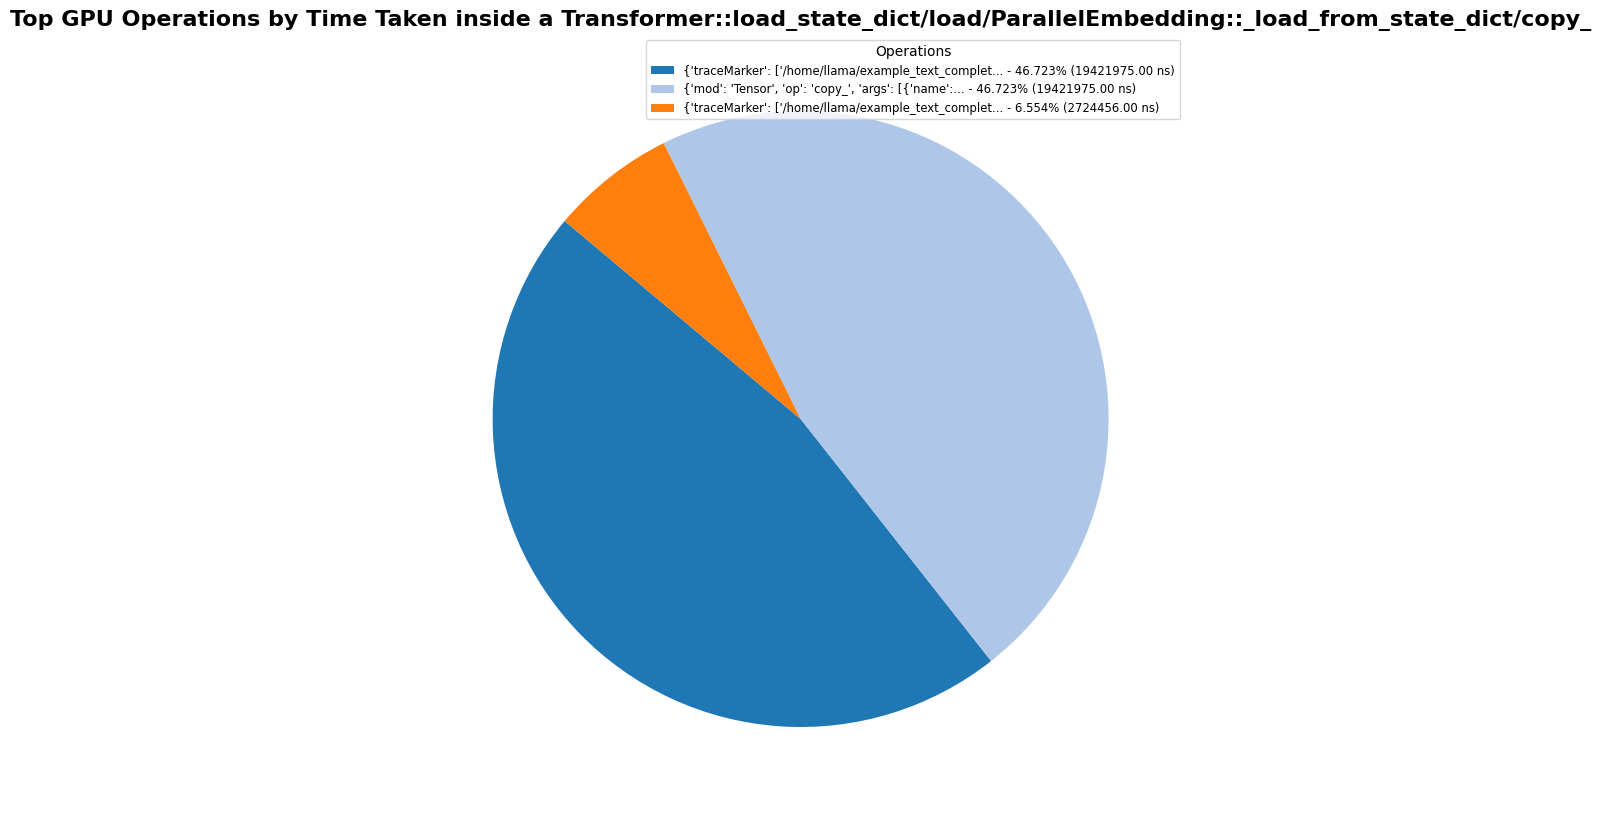

In [95]:
filter_and_plot_gpu_operations(df_nvtx_gpu_proj_trace, "Transformer::load_state_dict/load/ParallelEmbedding::_load_from_state_dict/copy_", "Transformer::load_state_dict/load/ColumnParallelLinear::_load_from_state_dict/copy_", None)

### Transformer Analysis

Start Index: 2298
End Index: 8226
Selected Rows after filtering:


/var/folders/sg/b1qbnvkj7fjbgjw1kzc9drzw0000gn/T/ipykernel_49108/4093825718.py:25: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_selected = df_selected[~df_selected['Name'].str.contains('(/home|traceMarker)')]


,Name,Projected Start (ns),Projected Duration (ns),Orig Start (ns),Orig Duration (ns),Style,PID,TID,NumGPUOps,Lvl,NumChild,RangeId,ParentId,RangeStack
2299,tok_embeddings: ParallelEmbedding,16367389182,15264,16054716267,313858936,PushPop,734,734,1,1417,1,34938,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
2317,0: TransformerBlock,16380786212,360374211,16380438077,360867255,PushPop,734,734,43,1417,6,35610,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
2498,1: TransformerBlock,16741606984,24707302,16741314802,25139790,PushPop,734,734,43,1417,6,36712,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
2679,2: TransformerBlock,16766737776,24511429,16766461902,24926092,PushPop,734,734,43,1417,6,37176,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
2860,3: TransformerBlock,16791671030,24017541,16791394804,24429294,PushPop,734,734,43,1417,6,37639,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
3041,4: TransformerBlock,16816234045,24207812,16815832078,24741332,PushPop,734,734,43,1417,6,38101,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
3222,5: TransformerBlock,16840851907,24198788,16840581160,24603464,PushPop,734,734,43,1417,6,38563,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
3403,6: TransformerBlock,16865476937,24915751,16865192274,25340569,PushPop,734,734,43,1417,6,39025,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
3584,7: TransformerBlock,16890815153,24614726,16890540353,25032161,PushPop,734,734,43,1417,6,39489,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...
3765,8: TransformerBlock,16915859768,61791248,16915581434,62202194,PushPop,734,734,43,1417,6,39952,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...


Unique Names: ['tok_embeddings: ParallelEmbedding' '0: TransformerBlock'
 '1: TransformerBlock' '2: TransformerBlock' '3: TransformerBlock'
 '4: TransformerBlock' '5: TransformerBlock' '6: TransformerBlock'
 '7: TransformerBlock' '8: TransformerBlock' '9: TransformerBlock'
 '10: TransformerBlock' '11: TransformerBlock' '12: TransformerBlock'
 '13: TransformerBlock' '14: TransformerBlock' '15: TransformerBlock'
 '16: TransformerBlock' '17: TransformerBlock' '18: TransformerBlock'
 '19: TransformerBlock' '20: TransformerBlock' '21: TransformerBlock'
 '22: TransformerBlock' '23: TransformerBlock' '24: TransformerBlock'
 '25: TransformerBlock' '26: TransformerBlock' '27: TransformerBlock'
 '28: TransformerBlock' '29: TransformerBlock' '30: TransformerBlock'
 '31: TransformerBlock' 'norm: RMSNorm' 'output: ColumnParallelLinear'
 "{'mod': 'Tensor', 'op': '__truediv__', 'args': [{'name': '', 'type': 'tensor', 'shape': (1, 32000), 'dtype': 'float32'}]}"
 "{'mod': 'torch', 'op': 'softmax', 'arg

,Name,Projected Start (ns),Projected Duration (ns),Orig Start (ns),Orig Duration (ns),Style,PID,TID,NumGPUOps,Lvl,NumChild,RangeId,ParentId,RangeStack,Time (%)
2299,tok_embeddings: ParallelEmbedding,16367389182,15264,16054716267,313858936,PushPop,734,734,1,1417,1,34938,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,0.001263
2317,0: TransformerBlock,16380786212,360374211,16380438077,360867255,PushPop,734,734,43,1417,6,35610,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,29.826840
2498,1: TransformerBlock,16741606984,24707302,16741314802,25139790,PushPop,734,734,43,1417,6,36712,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,2.044932
2679,2: TransformerBlock,16766737776,24511429,16766461902,24926092,PushPop,734,734,43,1417,6,37176,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,2.028720
2860,3: TransformerBlock,16791671030,24017541,16791394804,24429294,PushPop,734,734,43,1417,6,37639,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,1.987843
3041,4: TransformerBlock,16816234045,24207812,16815832078,24741332,PushPop,734,734,43,1417,6,38101,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,2.003591
3222,5: TransformerBlock,16840851907,24198788,16840581160,24603464,PushPop,734,734,43,1417,6,38563,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,2.002844
3403,6: TransformerBlock,16865476937,24915751,16865192274,25340569,PushPop,734,734,43,1417,6,39025,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,2.062185
3584,7: TransformerBlock,16890815153,24614726,16890540353,25032161,PushPop,734,734,43,1417,6,39489,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,2.037270
3765,8: TransformerBlock,16915859768,61791248,16915581434,62202194,PushPop,734,734,43,1417,6,39952,34937.0,:3877:3878:3879:3880:3881:3882:3883:3884:3887:3888:3889:3890:3891:3892:3893:3894:3895:3896:3899:...,5.114233


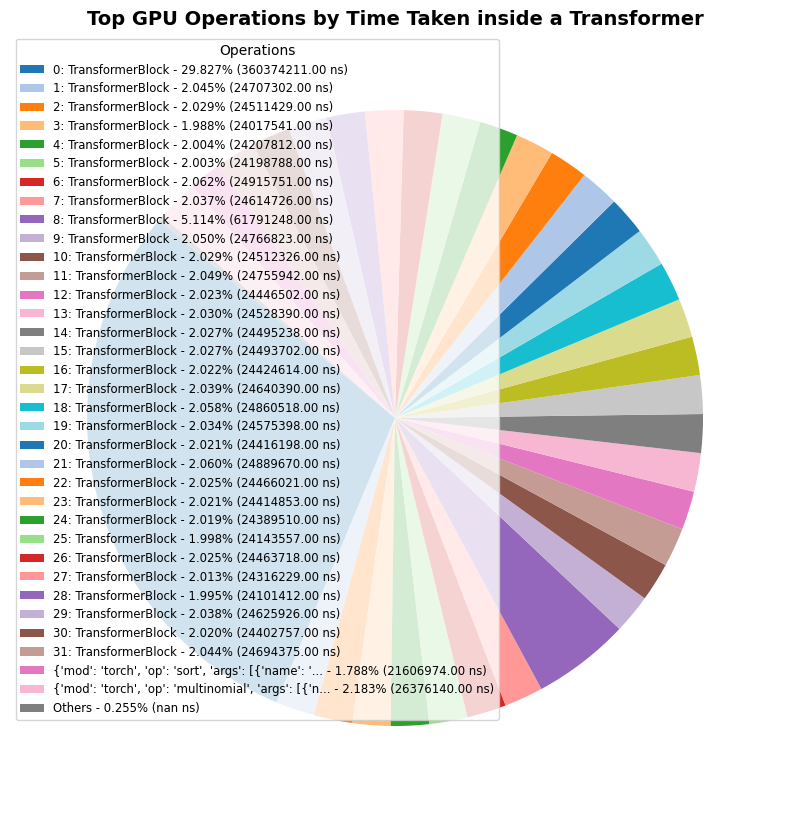

In [144]:
filter_and_plot_gpu_operations(df_nvtx_gpu_proj_trace, "Transformer", "Transformer", 1417)